# Oscillation in eeg 

In [45]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
import pandas as pd 
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns

warnings.filterwarnings('ignore')

In [47]:
time = 1/20_000 # in seconds
unit_time = 's'
start = 1 # in seconds
end = 1.01 

Text(0.5, 1.0, 'EEG signal on the first 3000 rows')

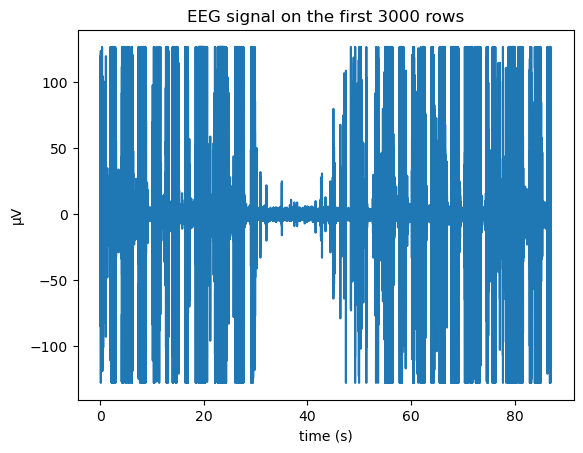

In [48]:
df = pd.read_csv('../data/EEGArchi13mPFC.txt')
# df = df.iloc[int(start*20_000):int(end*20_000)] 
df['time'] = df.index * time
df.rename(columns={'0': 'µV'}, inplace=True)
plt.plot(df['time'], df['µV'])
plt.xlabel(f'time ({unit_time})')
plt.ylabel('µV')
plt.title('EEG signal on the first 3000 rows')

## 1 Fourier transform

Text(0.5, 1.0, 'Fourier transform of the EEG signal')

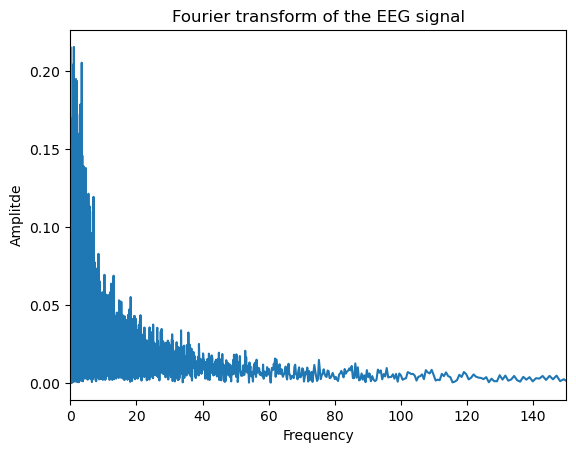

In [49]:
import scipy as sp 
import scipy.fftpack
import numpy as np

df_f = df.copy()
df_f['amplitude'] = sp.fftpack.fft(df_f['µV'])/len(df_f['µV'])
plt.plot(1/df_f['time'], np.abs(df_f['amplitude']))
plt.xlabel(f'Frequency')
plt.xlim(0, 150)
plt.ylabel('Amplitde')
plt.title('Fourier transform of the EEG signal')

- gamma = 30 Hz 
- Theta = 5-12 Hz

peut être une normalisation a faire

## Article 

Fig1A

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


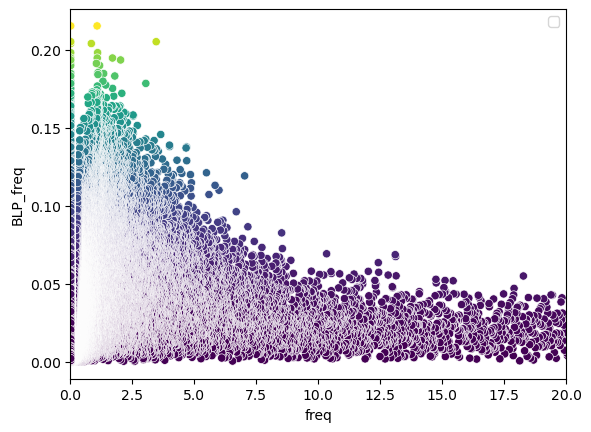

In [55]:
htmap = pd.DataFrame()
htmap["freq"] = 1/df_f["time"]
htmap = htmap[htmap["freq"] < 150]
# change the calculation of the BLP_freq and power 
htmap["BLP_freq"] = np.abs(df_f["amplitude"]) 
htmap["power"] = htmap["BLP_freq"]**2
sns.scatterplot(data = htmap, x = "freq", y = "BLP_freq",hue="power", palette="viridis", legend=False)
plt.xlim(0,150)
plt.legend()

In [62]:
htmap = htmap.set_index(['freq'])
htmap.drop(columns=['power'], inplace=True)

KeyError: "None of ['freq'] are in the columns"

sns.heat

## Create heatmap
sur l'intervalle bio possible 

In [51]:
range_min = 0
range_max = 150
df_f["freq"] = 1/df_f["time"]
df_f = df_f[(df_f["freq"] > range_min) & (df_f["freq"] < range_max)]
df_f

,µV,time,amplitude,freq
134,1,0.00670,-0.001105-0.002105j,149.253731
135,1,0.00675,-0.001030+0.000486j,148.148148
136,0,0.00680,-0.004670+0.000379j,147.058824
137,-3,0.00685,-0.002098+0.000958j,145.985401
138,-1,0.00690,0.002699+0.003603j,144.927536
...,...,...,...,...
1739494,0,86.97470,-0.003865+0.003142j,0.011498
1739495,0,86.97475,0.003693-0.001373j,0.011498
1739496,0,86.97480,0.004371-0.001578j,0.011498
1739497,0,86.97485,-0.002863-0.002170j,0.011498


In [52]:
# htmap = df_f.copy()
# htmap = htmap.drop(columns=['µV'])
# sns.heatmap(htmap, annot=True)